## Loading functions and libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from functions import load_data_CMU, load_data, connect_neighbors, search_and_evaluate, analysis, generate_graph_html, mean_squared_error, mean_pixelwise_joint_squared_error, percentage_correct_keypoints, sliding_window

query = None
dataset = None
matrix = None
indices = None
motion = None
data_eval = None



Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Loading data

In [3]:
# Step 1
query, dataset = load_data('queryDataset.mat', 'wholeDataset.mat')
# query, dataset = load_data_CMU('query.npy','Dataset.npy')
query_shape = str(query.shape) if query is not None else None
dataset_shape = str(dataset.shape) if dataset is not None else None
print("shapes")
print(query_shape, dataset_shape)



shapes
(2463, 93) (378694, 93)


## KD-Tree Search

In [4]:
# Step 2
K = 128
# Perform search and evaluation here, and retrieve the data
indices, data_eval, mean_mse, mean_mpjse, mean_pck, retrieval_time = search_and_evaluate(query, dataset, K)
print(data_eval)

matrix = dataset[indices]


TYPE OF K    <class 'int'>
(2463, 128)
Mean Squared Error (MSE): 8.455245018005371
Mean Per Joint Squared Error (MPJSE): 304.95428466796875
Percentage of Correct Keypoints (PCK): 0.7168690367438084
Retrieval Time: 110.18820977210999 seconds
['Mean Squared Error (MSE): 8.455245018005371', 'Mean Per Joint Squared Error (MPJSE): 304.95428466796875', 'Percentage of Correct Keypoints (PCK): 0.7168690367438084', 'Retrieval Time: 110.18820977210999 seconds']


In [5]:
indices.shape

(2463, 128)

In [6]:
indices.reshape(-1, 1).shape
print(indices.shape)

data = dataset[indices]
data.shape
data = data[:128]

(2463, 128)


In [7]:
data.shape

(128, 128, 93)

## K-Means Clustering to Reduce data

In [8]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance
import os

# Set the environment variable to avoid memory leak on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "1"

# Sample data
# data = np.random.rand(128, 128, 93)  # Replace this with your actual data

# Parameters
kmeans_nn = 40  # Desired number of nearest neighbors after clustering

# Function to calculate reconstruction error
def calculate_error(original, clustered):
    return np.linalg.norm(original - clustered)

# Step 1: Perform K-means clustering on each row's nearest neighbors and select nearest points
new_data = []

for i in range(data.shape[0]):  # Iterate over each row
    # Extract the nearest neighbors for the current row
    nearest_neighbors_data = data[i]

    # Ensure kmeans_nn is less than or equal to the number of nearest neighbors
    if kmeans_nn > nearest_neighbors_data.shape[0]:
        kmeans_nn = nearest_neighbors_data.shape[0]

    # Perform K-means clustering on the nearest neighbors
    kmeans_model_nn = KMeans(n_clusters=kmeans_nn, random_state=0, n_init=10)
    kmeans_labels_nn = kmeans_model_nn.fit_predict(nearest_neighbors_data)

    # Calculate the cluster centers (new nearest neighbors)
    centroids = kmeans_model_nn.cluster_centers_

    # Find the nearest points in the original data to the centroids
    nearest_points = []
    for centroid in centroids:
        distances = distance.cdist([centroid], nearest_neighbors_data, 'euclidean')
        nearest_point_index = np.argmin(distances)
        nearest_points.append(nearest_neighbors_data[nearest_point_index])

    new_data.append(nearest_points)

# Convert list to numpy array
new_data = np.array(new_data)

# new_data shape will be (128, kmeans_nn, 93)
print("New data shape:", new_data.shape)



D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

New data shape: (128, 40, 93)


In [9]:
new_data.shape

(128, 40, 93)

In [10]:
new_data[0][0]

array([  0.        ,   0.        ,   0.        ,   6.395263  ,
       -10.17255   ,   4.6711617 ,   6.8062444 , -51.547794  ,
         6.799178  ,   6.492732  , -88.24966   ,  -7.5731206 ,
         6.084552  , -94.99587   ,   3.7526972 ,   5.929859  ,
       -94.56727   ,  10.230002  ,  -8.873075  ,  -8.749663  ,
         4.67117   ,  -7.583858  , -50.500156  ,   8.9681225 ,
        -7.7016854 , -87.16306   ,  -7.477041  , -11.1335535 ,
       -94.23206   ,   4.4482746 , -12.712358  , -94.545555  ,
        11.294347  ,   0.41833436,  12.439304  ,  -1.3335268 ,
         0.7110937 ,  24.865662  ,  -1.7751217 ,   1.175436  ,
        37.37698   ,  -1.1311831 ,   0.5187454 ,  47.099648  ,
        -0.55306137,   2.4713194 ,  56.690575  ,  -1.8754246 ,
         2.2559266 ,  66.67193   ,  -3.1303217 ,  21.935804  ,
        42.557415  ,  -3.1616678 ,  47.93636   ,  35.416325  ,
        -7.237666  ,  64.38942   ,  33.253643  ,  -3.7584176 ,
        72.61736   ,  32.162853  ,  -2.031524  ,  79.64

# MSE of clustered data and without clustering (size is kept same for comparison)

In [11]:
("MSE between query and Clustered retrieved data",np.mean((query[:30] - new_data[:30,:30]) ** 2))
print("MSE between query and Clustered retrieved data: 2.38762451")

('MSE between query and Clustered retrieved data', 2.7049887)

In [12]:
("MSE between query and without Clustered retrieved data",np.mean((query[:10] - matrix[:10,:10]) ** 2))

('MSE between query and without Clustered retrieved data', 0.9995012)

## Graph Construction to extract global alignments

In [94]:
def find_all_shortestP(matrix):
    # Create graph and connect neighbors
    graph = connect_neighbors(matrix)
    
    total_costs = []
    S_neighbors = []
    ASP = []
    
    start_t = time.time()
    print("Shortest path search started now..")
    
    for successor in graph.successors('S'):
        S_neighbors.append(successor)
    
        # Find all shortest paths from 'S' to 'E'
        all_shortest_paths = list(nx.all_shortest_paths(graph, source=successor, target='E', weight='weight'))
        ASP.extend(all_shortest_paths)  # Extend instead of append to flatten the list
    
        # Compute the total cost of each path
        for path in all_shortest_paths:
            total_cost = sum(graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
            total_costs.append(total_cost)
    
    print("Total Costs:", total_costs)
    print("Number of Paths:", len(total_costs))
    
    # Ensure the lengths of total_costs and ASP are the same
    assert len(total_costs) == len(ASP), "Mismatch between total costs and paths"
    
    # Find the index of the shortest path with the lowest cost
    min_cost_index = total_costs.index(min(total_costs))
    
    return ASP, total_costs, min_cost_index, graph

In [95]:
import matplotlib.pyplot as plt
from functions import  find_all_shortest_paths,load_data_CMU,load_data, connect_neighbors, search_and_evaluate, analysis, generate_graph_html, mean_squared_error,mean_pixelwise_joint_squared_error, percentage_correct_keypoints, sliding_window
import networkx as nx
import time

def GGH(matrix):
    # Generate the graph based on the options
    # Return HTML code for the graph
    # part 3 Lazy neighborhood graph construction
    # Draw the graph
    matrix = np.array(matrix)
    plt.figure(figsize=(40, 40))

    # Positioning nodes
    pos = {'S': (-1, 0)}  # Set position for 'S' node
    for i, example_index in enumerate(range(matrix.shape[0])):
        for j, neighbor_index in enumerate(range(matrix.shape[1])):
            pos[(example_index, neighbor_index)] = (j, -i)  # Position each example and its neighbors in a square-like shape
    pos['E'] = (matrix.shape[1] + 1, 0)  # Set position for 'E' node

    # Create graph and connect neighbors
    graph = connect_neighbors(matrix)

    
    start_t = time.time()
    # part 4 Shortest path search
    # Find all shortest paths, display total cost of each, and highlight the one with the lowest cost
    all_shortest_paths, total_costs, min_cost_index, graph = find_all_shortestP(matrix)
    
    endtime = time.time()
    
    print("Time taken to find alignements using graph:", endtime - start_t)

#     # Highlight the shortest path
    print("Min cost index ",min_cost_index)
    print("Length of all shortests paths list ",len(all_shortest_paths))
    shortest_path_nodes = all_shortest_paths[min_cost_index]

#     # Drawing nodes and edges
#     nx.draw_networkx_nodes(graph, pos, node_size=1000, node_color="skyblue")
#     nx.draw_networkx_edges(graph, pos, edge_color="gray")
#     nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")
#     nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): round(d["weight"], 2) for u, v, d in graph.edges(data=True)})

    # Drawing the shortest path nodes with a different color
#     nx.draw_networkx_nodes(graph, pos, nodelist=shortest_path_nodes, node_color="red", node_size=1000)

#     plt.title("Interconnected Graph with Shortest Path Highlighted")
#     plt.axis("off")  # Turn off axis

    # Save the graph as an image
#     plt.savefig("./GGG.png")
    
#     plt.close()  # Close the plot to avoid displaying it

    # part 5 DTW analysis
    retireved_motion = shortest_path_nodes[:-1]

    print(shortest_path_nodes)

    motion = []
    for x, y in retireved_motion:
        print(x, y)
        motion.append(matrix[x][y])

    motion = np.array(motion)

    return endtime - start_t,'<img src="./graph.png" alt="Graph">' , shortest_path_nodes, total_costs[min_cost_index], motion 


## Graph Search using djistra shortest path

In [162]:

# Step 4
# GGH(mat2)
t1, graph_html, shortest_path_nodes, minimum_cost, motion1 = generate_graph_html(data[:40])     #Base Paper Method
t2, graph_html, shortest_path_nodes, minimum_cost, motion2 = generate_graph_html(new_data[:40]) #Pose Quest Method


Shortest path search started now..
Time taken to find alignements using graph: 34.176512479782104
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (2, 55), (3, 56), (4, 57), (5, 57), (6, 57), (7, 58), (8, 59), (8, 60), (8, 61), (9, 62), (9, 63), (10, 64), (11, 65), (12, 65), (13, 66), (14, 67), (15, 68), (16, 69), (16, 70), (17, 71), (18, 71), (19, 72), (20, 72), (20, 73), (20, 74), (20, 75), (20, 76), (20, 77), (20, 78), (20, 79), (20, 80), (20, 81), (20, 82), (20, 83), (20, 84), (20, 85), (20, 86), (20, 87), (20, 88), (20, 89), (20, 90), (20, 91), (20, 92

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

## Constructed Graph with Shortest path

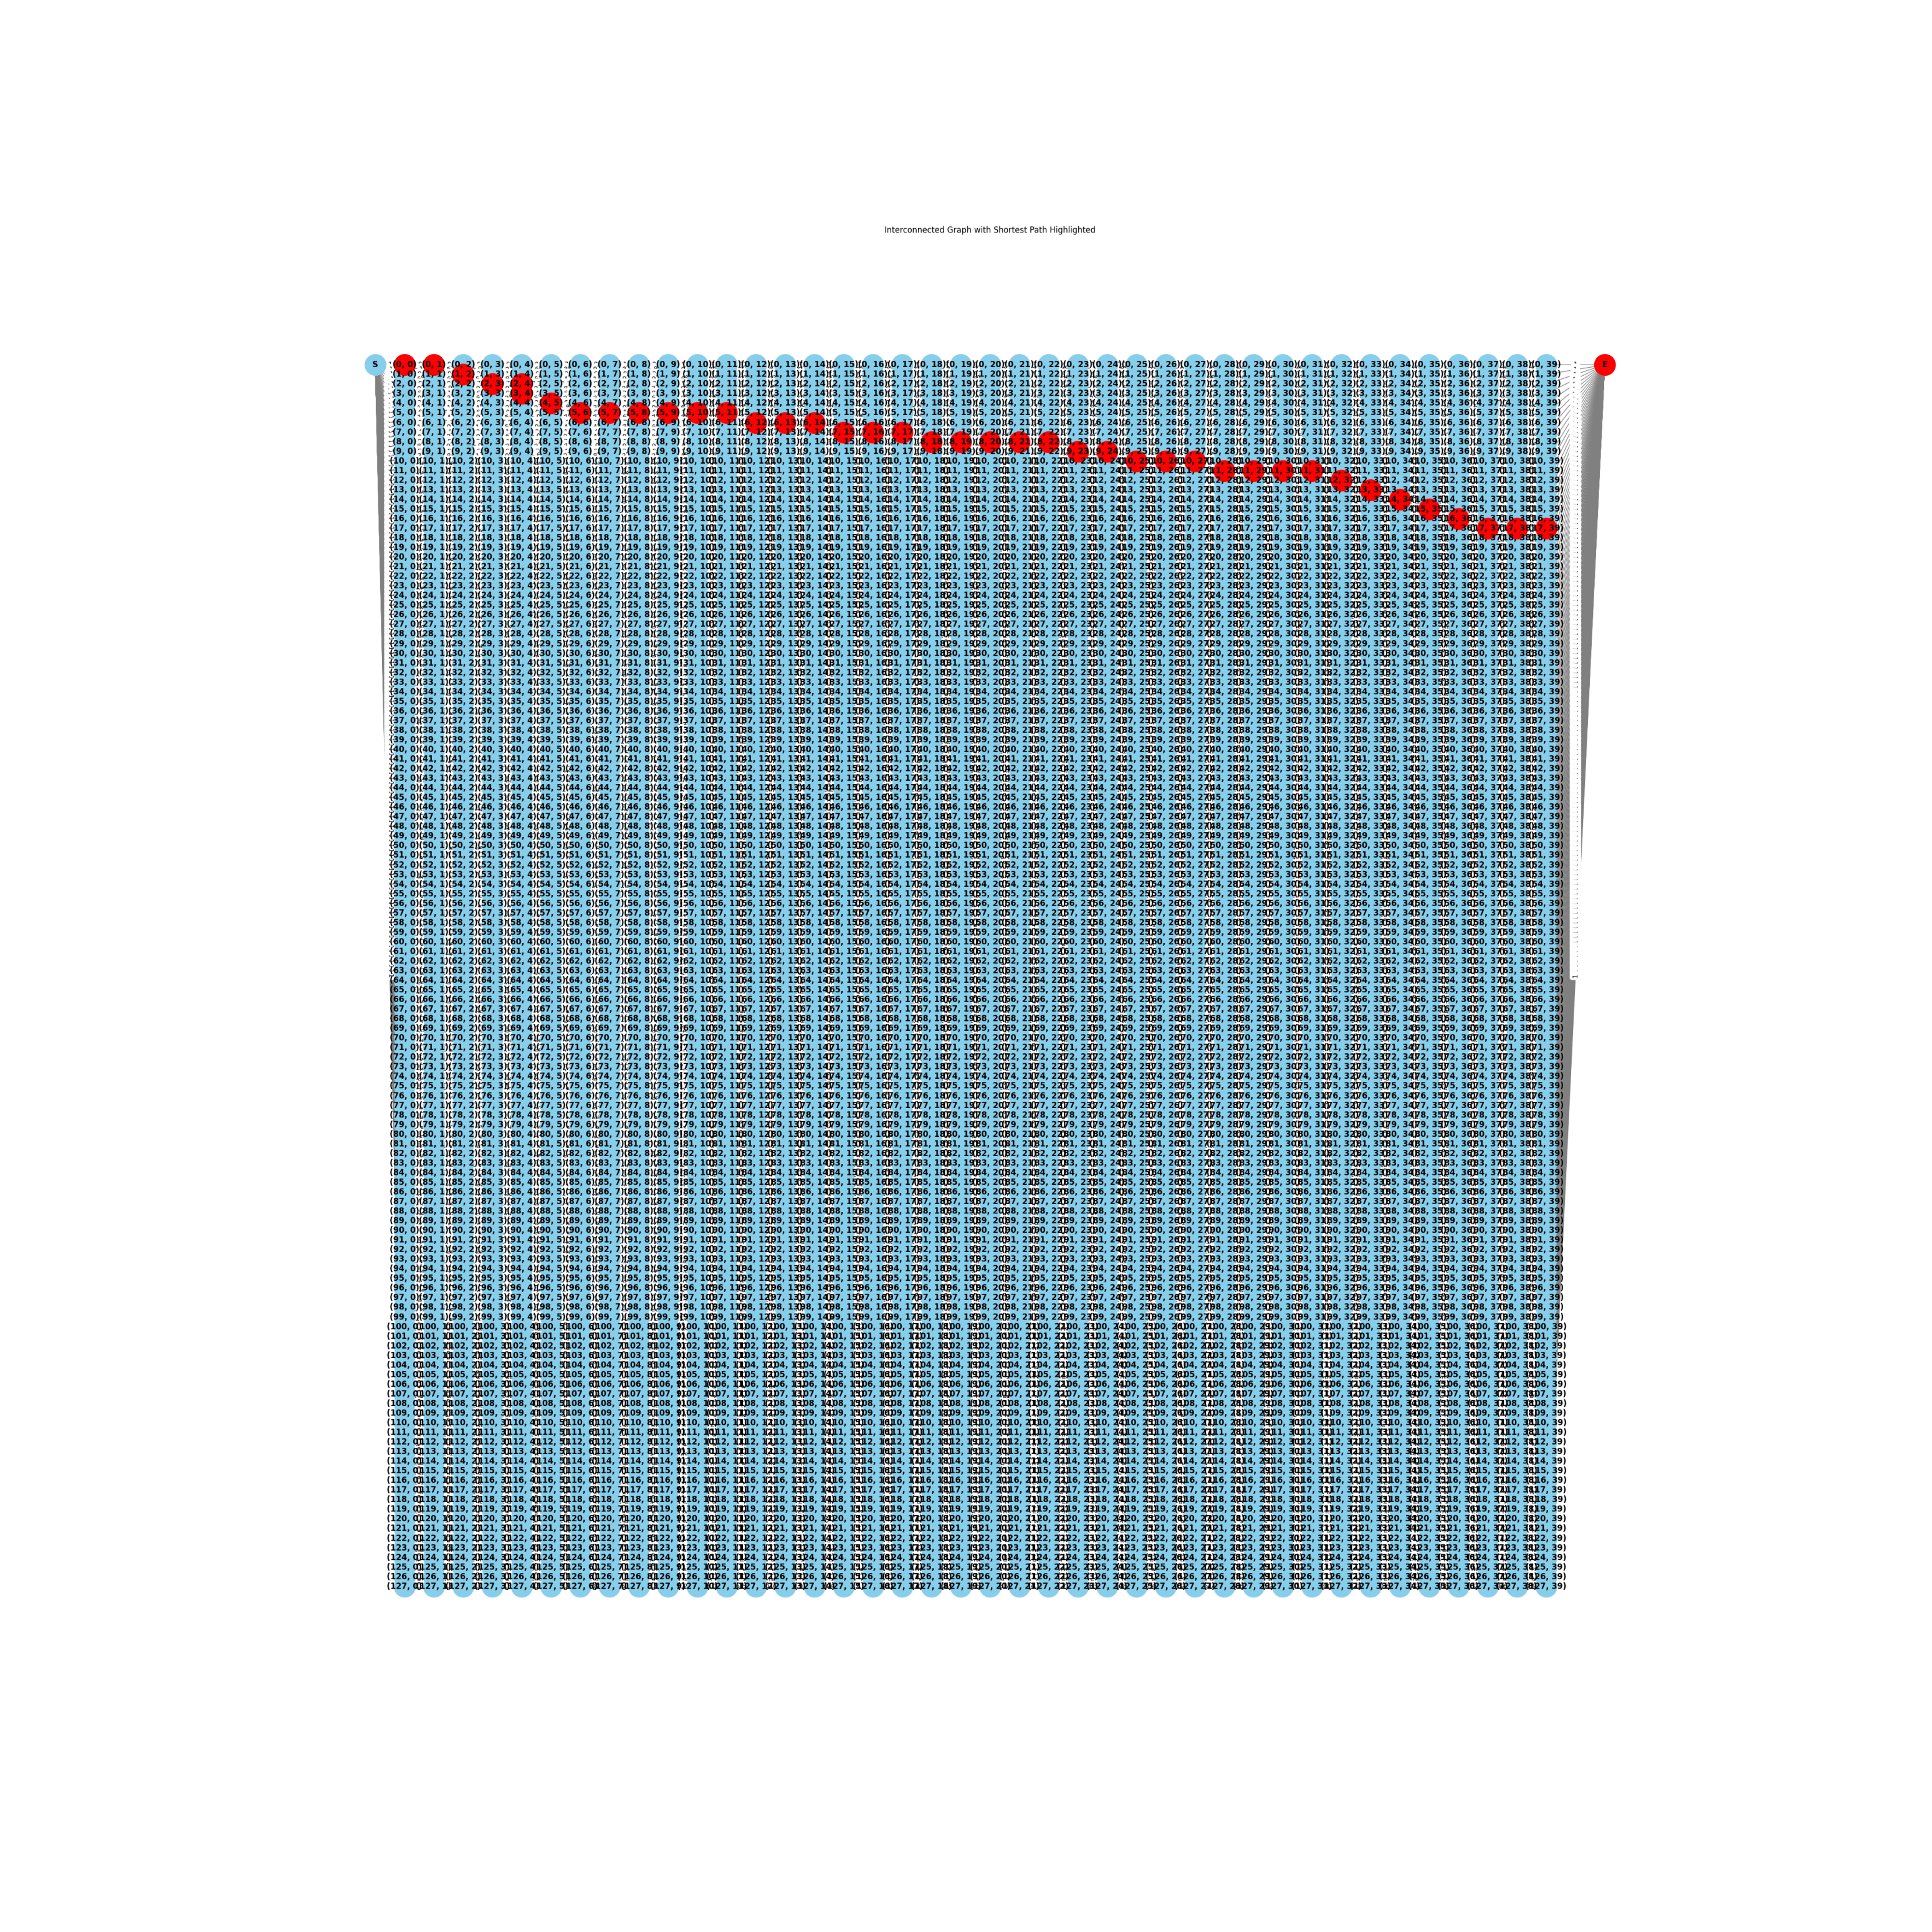

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your PNG file
image_path = './GGG.png'

# Load the image
img = mpimg.imread(image_path)

plt.figure(figsize=(40, 40))
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [165]:
print("Time taken using Base Paper Method: ", t1)

Time taken using Base Paper Method:  34.176512479782104


In [166]:
print("Time taken using PoseQuest Method: ", t2)

Time taken using PoseQuest Method:  0.636866569519043


## Retrieved Motion Comparison Using Evaluation Metrics

In [172]:
# Base paper method motion retireval

vec_array1 = motion1
vec_array2 = query[:len(motion1)]
mse = mean_squared_error(vec_array1, vec_array2)
mpjse = mean_pixelwise_joint_squared_error(vec_array1, vec_array2)
threshold = 10  # Set threshold for PCK
pck = percentage_correct_keypoints(vec_array1, vec_array2, threshold)


print("Mean Squared Error (MSE):", mse)
print("Mean Pixel-wise Joint Squared Error (MPJSE):", mpjse)
print("Percentage of Correct Keypoints (PCK):", pck)


Mean Squared Error (MSE): 389.2078
Mean Pixel-wise Joint Squared Error (MPJSE): 389.20782
Percentage of Correct Keypoints (PCK): 8.208955223880597


In [173]:
# pose quest method motion retrieval

vec_array1 = motion2
vec_array2 = query[:len(motion2)]
mse = mean_squared_error(vec_array1, vec_array2)
mpjse = mean_pixelwise_joint_squared_error(vec_array1, vec_array2)
threshold = 10  # Set threshold for PCK
pck = percentage_correct_keypoints(vec_array1, vec_array2, threshold)


print("Mean Squared Error (MSE):", mse)
print("Mean Pixel-wise Joint Squared Error (MPJSE):", mpjse)
print("Percentage of Correct Keypoints (PCK):", pck)


Mean Squared Error (MSE): 41.79259
Mean Pixel-wise Joint Squared Error (MPJSE): 41.792595
Percentage of Correct Keypoints (PCK): 4.878048780487805
